# Results notebook

In this notebook, I have tested out the different algorithms:
- how long they take to find the goal position, for this, start timer and end timer
- memory usage, need to figure this out
- how optimal is the path, this is shown by:
    - distance of the path
    - how many turns need to be taken
    - Using the stats.get_time_to_path(path) func, it can show which path truly takes the least time not depending on distance traveled or number of turns
- To compare between diff algorithms, I need to compare:
    - memory usage by each algorithm (if more than 2gbs, there is a problem)
    - Time it takes for path taken (most important I think)
    - Time taken for algorithm to run
    - Maybe need to run and algorithm on each maze for figuring out the maze, the floodfill x BFS, or just BFS, this will help identify in real life, how long it would take to figure out the maze before the algorithms even start. Most prob would be all offline. If online, we store the path taken by each algorithm, use that same algorithm to get the path back to the start (or use floodfill) while simulatuasly running the algorithm to find the path to get the path to centre. This would give me the time for everything given that I have 10 mins to try taking the most optimal path. //

In [1]:
from algorithms.utilities.Utils import Utils
from algorithms.utilities.Stats import Stats

from algorithms.classical.floodfill.FloodFill import FloodFill
from algorithms.classical.bfs.BFS import BFS
from algorithms.classical.dijkstra.Dijkstra import Dijkstra
from algorithms.classical.astar.AStar import AStar

from algorithms.reinforcement_learning.sarsa.Sarsa import Sarsa
from algorithms.reinforcement_learning.q_learning.Qlearning import QLearning
from algorithms.reinforcement_learning.dynaq.DynaQLearning import DynaQLearning
from algorithms.reinforcement_learning.dynaq.DynaQSarsa import DynaQSarsa

from algorithms.ExploreMaze import ExploreMaze

In [2]:
maze = Utils.load_maze('mazes/competition_json/alljapan-044-2023-exp-fin.json')

## Classical Algorithms

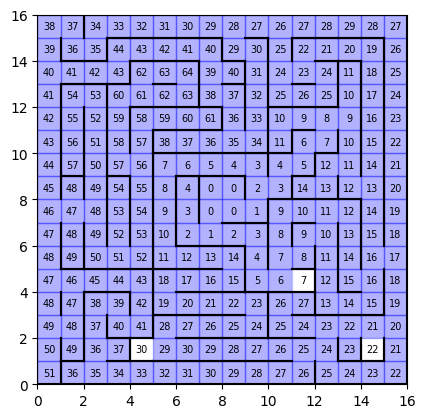

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (1, 7), (2, 7), (2, 8), (2, 9), (2, 10), (2, 11), (2, 12), (2, 11), (2, 10), (2, 9), (2, 8), (2, 7), (2, 6), (2, 5), (3, 5), (4, 5), (4, 6), (4, 7), (4, 8), (4, 9), (4, 10), (4, 11), (5, 11), (6, 11), (7, 11), (6, 11), (5, 11), (4, 11), (4, 10), (4, 9), (3, 9), (3, 10), (3, 11), (3, 12), (4, 12), (5, 12), (6, 12), (6, 13), (5, 13), (4, 13), (4, 12), (3, 12), (3, 11), (3, 10), (3, 9), (4, 9), (4, 8), (4, 7), (4, 6), (4, 5), (3, 5), (2, 5), (2, 6), (2, 7), (1, 7), (1, 6), (1, 5), (1, 6), (1, 7), (0, 7), (0, 6), (0, 5), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 3), (4, 2), (3, 2), (3, 3), (2, 3), (2, 2), (2, 1), (3, 1), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (11, 1), (10, 1), (9, 1), (8, 1), (7, 1), (6, 1), (5, 1), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (9, 3), (8, 3), (7, 3), (6, 3), (5, 3), (5, 4), (6, 4), (7, 4), (8, 4), (8, 5), (7, 5), (6, 5), (5, 5), (5, 6), (5, 7), 

In [3]:
utils = Utils()
stats = Stats()
explore = ExploreMaze(maze=maze)
explore.move_and_floodfill()
walls = explore.get_walls()
utils.draw_maze(walls, dist_map=explore.flood_fill(explore.get_goal_position()), path=explore.path)
# print(walls == maze)
print(explore.path)
print(stats.get_time_from_path(explore.path))

### Floodfill

In [4]:
flood = FloodFill(walls=maze)
flood_path = flood.get_path_from_flood_map()
print(flood.get_stats())

(52, 25, 0)


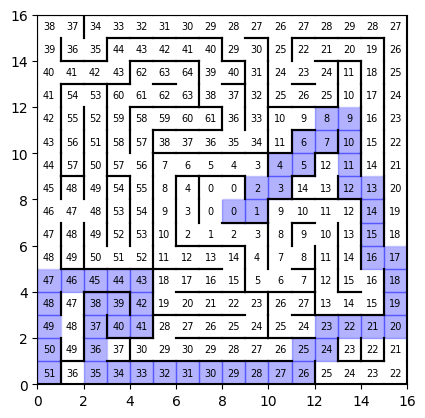

In [5]:
Utils().draw_maze(walls=maze, path=flood_path, dist_map= flood.flood_map)

In [6]:
stats = Stats()
print(stats.get_time_from_path(flood_path))

19.240161480663875


### BFS

In [7]:
bfs = BFS(walls=maze)
bfs_path = bfs.find_shortest_path_to_goal()
print(bfs.get_stats())

1
(52, 27, 0)


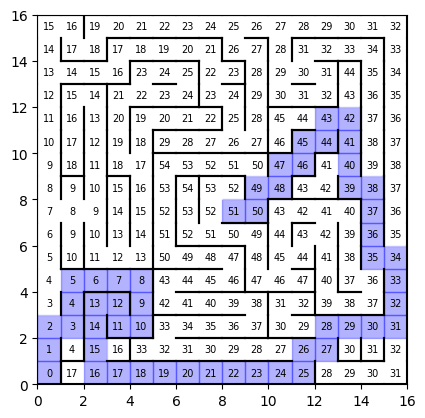

In [8]:
Utils().draw_maze(walls=maze, path=bfs_path, dist_map = bfs.distances)

In [9]:
stats = Stats()
print(stats.get_time_from_path(bfs_path))

20.377248205546


### Dijkstra

In [10]:
dijkstra = Dijkstra(walls=maze)
dijkstra_path = dijkstra.find_shortest_path_to_goal()
print(dijkstra.get_stats())

(52, 28, 0)


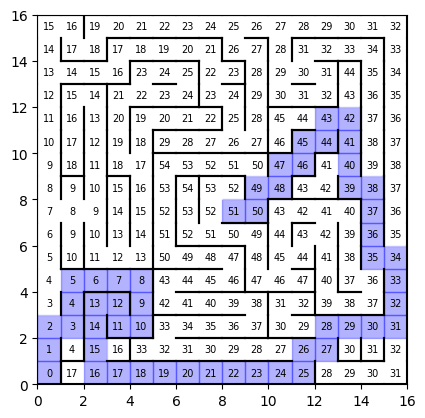

In [11]:
Utils().draw_maze(walls=maze, path=dijkstra_path, dist_map = dijkstra.distances)

In [12]:
print(stats.get_time_from_path(dijkstra_path))

20.377248205546


### A*

In [13]:
astar = AStar(walls=maze)
astar_path = astar.find_shortest_path_to_goal()
print(astar.get_stats())

Filename: D:\Diss\Simulator\final\algorithms\classical\astar\AStar.py

Line #    Mem usage    Increment  Occurrences   Line Contents
    51    124.0 MiB    124.0 MiB           1       @profile
    52                                             def find_shortest_path_to_goal(self):
    53    124.0 MiB      0.0 MiB           1           self.a_star()
    54    124.0 MiB      0.0 MiB           9           goal_position = min(self.goal_positions, key=lambda pos: self.distances[pos[0]][pos[1]])
    55    124.0 MiB      0.0 MiB           1           self.curr_position = goal_position
    56    124.0 MiB      0.0 MiB           1           self.path.append(self.curr_position)
    57                                         
    58    124.0 MiB      0.0 MiB          52           while self.curr_position != self.start_position:
    59    124.0 MiB      0.0 MiB          51               x, y = self.curr_position
    60    124.0 MiB      0.0 MiB         357               neighbors = [(x + dx, y + d

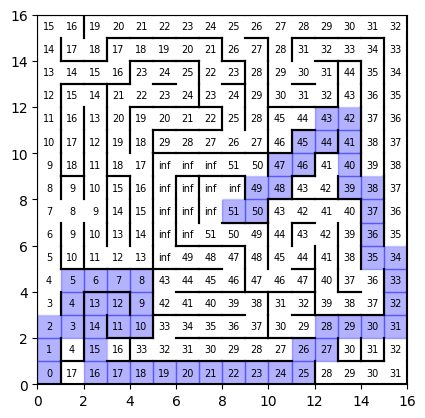

In [14]:
Utils().draw_maze(walls=maze, path=astar_path, dist_map = astar.distances)

In [15]:
stats = Stats()
print(stats.get_time_from_path(astar_path))

20.377248205546


## Reinforcememnt Learning

### Sarsa

In [16]:
sarsa = Sarsa(walls=maze)

Running agent: 0
stopped at episode: 298
Running agent: 1
stopped at episode: 326
Running agent: 2
stopped at episode: 371
Running agent: 3
stopped at episode: 322
Running agent: 4
stopped at episode: 326
Running agent: 5
stopped at episode: 337
Running agent: 6
stopped at episode: 360
Running agent: 7
stopped at episode: 279
Running agent: 8
stopped at episode: 332
Running agent: 9
stopped at episode: 304
Running agent: 10
stopped at episode: 352
Running agent: 11
stopped at episode: 289
Running agent: 12
stopped at episode: 266
Running agent: 13
stopped at episode: 250
Running agent: 14
stopped at episode: 348
Choose path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 15), (1, 14), (2, 14), (2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15, 15), (15, 14), (15, 13), (15, 12), (15, 11), (15, 10), (15, 9), (15, 8), (15, 

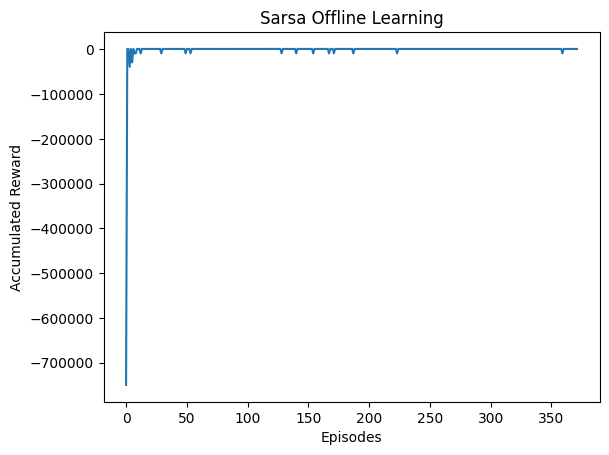

In [17]:
sarsa.run_sarsa()
sarsa_path = sarsa.get_path()

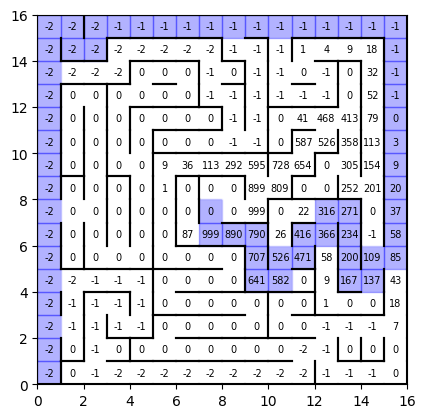

In [18]:
Utils.draw_maze(walls=maze, dist_map=sarsa.get_max_q_values(), path=sarsa_path)

In [19]:
stats = Stats()
stats.get_time_from_path(sarsa_path)

16.47336585193466

### QLearning


Running agent: 0
stopped at episode: 63
Running agent: 1
stopped at episode: 77
Running agent: 2
stopped at episode: 79
Running agent: 3
stopped at episode: 63
Running agent: 4
stopped at episode: 66
Running agent: 5
stopped at episode: 83
Running agent: 6
stopped at episode: 77
Running agent: 7
stopped at episode: 67
Running agent: 8
stopped at episode: 67
Running agent: 9
stopped at episode: 99
Running agent: 10
stopped at episode: 70
Running agent: 11
stopped at episode: 54
Running agent: 12
stopped at episode: 81
Running agent: 13
stopped at episode: 72
Running agent: 14
stopped at episode: 76
Choose path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 4), (2, 4), (3, 4), (4, 4), (4, 3), (4, 2), (3, 2), (3, 3), (2, 3), (2, 2), (2, 1), (2, 0), (3, 0), (4, 0), (5, 0), (6, 0), (7, 0), (8, 0), (9, 0), (10, 0), (11, 0), (11, 1), (10, 1), (9, 1), (8, 1), (7, 1), (6, 1), (5, 1), (5, 2), (6, 2), (7, 2), (8, 2), (9, 2), (9, 3), (8, 3), (7, 3), (6, 3), (5, 3), (5, 4), (6, 4), (7, 4), (8, 4), (

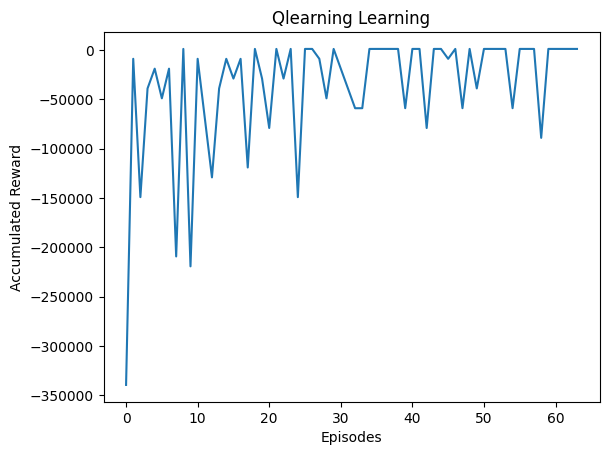

In [20]:
qlearning = QLearning(walls=maze)
qlearning.run_qlearning()
qlearning_path = qlearning.get_path()

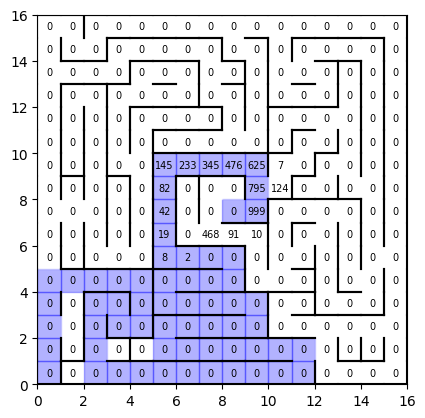

In [21]:
Utils.draw_maze(walls=maze, dist_map=qlearning.get_max_q_values(), path=qlearning_path)


In [22]:
stats = Stats()
stats.get_time_from_path(qlearning_path)

18.349766332760407

### DynaQ QLearning

Running agent: 0
stopped at episode: 9
Running agent: 1
stopped at episode: 17
Running agent: 2
stopped at episode: 11
Running agent: 3
stopped at episode: 9
Running agent: 4
stopped at episode: 7
Running agent: 5
stopped at episode: 8
Running agent: 6
stopped at episode: 6
Running agent: 7
stopped at episode: 6
Running agent: 8
stopped at episode: 6
Running agent: 9
stopped at episode: 8
Running agent: 10
stopped at episode: 9
Running agent: 11
stopped at episode: 10
Running agent: 12
stopped at episode: 7
Running agent: 13
stopped at episode: 11
Running agent: 14
stopped at episode: 9
Choose path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (1, 15), (1, 14), (2, 14), (2, 15), (3, 15), (4, 15), (5, 15), (6, 15), (7, 15), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15, 15), (15, 14), (15, 13), (15, 12), (15, 11), (15, 10), (15, 9), (15, 8), (15, 7), (15, 6), (15, 5), (14,

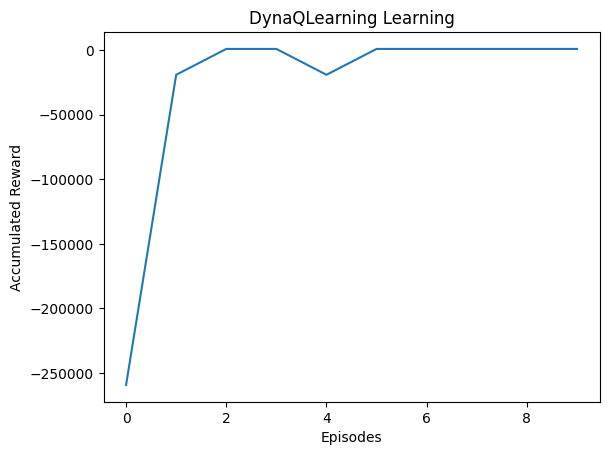

In [23]:
dyna_qlearning = DynaQLearning(walls=maze)
dyna_qlearning.run_dyna_qlearning()
dyna_qlearning_path = dyna_qlearning.get_path()

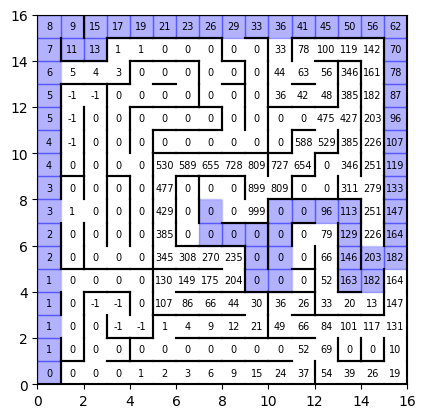

In [24]:
Utils.draw_maze(walls=maze, dist_map=dyna_qlearning.get_max_q_values(), path=dyna_qlearning_path)

In [25]:
stats = Stats()
stats.get_time_from_path(dyna_qlearning_path)

14.458291051235404

### DynaQ Sarsa


Running agent: 0
stopped at episode: 45
Running agent: 1
stopped at episode: 15
Running agent: 2
stopped at episode: 13
Running agent: 3
stopped at episode: 15
Running agent: 4
stopped at episode: 35
Running agent: 5
stopped at episode: 19
Running agent: 6
stopped at episode: 97
Running agent: 7
stopped at episode: 19
Running agent: 8
stopped at episode: 26
Running agent: 9
stopped at episode: 37
Running agent: 10
stopped at episode: 29
Running agent: 11
stopped at episode: 17
Running agent: 12
stopped at episode: 35
Running agent: 13
stopped at episode: 22
Running agent: 14
stopped at episode: 27
Choose path: [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (1, 13), (2, 13), (3, 13), (3, 14), (4, 14), (5, 14), (6, 14), (7, 14), (7, 13), (7, 12), (8, 12), (8, 11), (8, 10), (9, 10), (9, 11), (9, 12), (9, 13), (9, 14), (8, 14), (8, 15), (9, 15), (10, 15), (11, 15), (12, 15), (13, 15), (14, 15), (15, 15), (15, 14), (15, 1

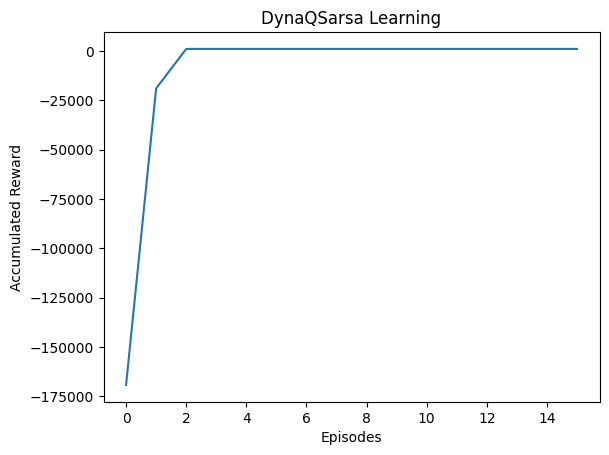

In [26]:
dynaq_sarsa = DynaQSarsa(walls=maze)
dynaq_sarsa.run_dyna_sarsa()
dynaq_sarsa_path = dynaq_sarsa.get_path()

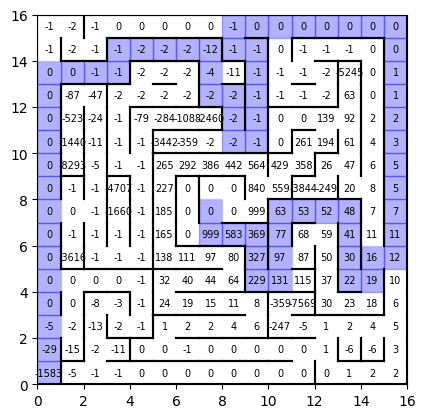

In [27]:
Utils.draw_maze(walls=maze, dist_map=dynaq_sarsa.get_max_q_values(), path=dynaq_sarsa_path)

In [28]:
stats = Stats()
stats.get_time_from_path(dynaq_sarsa_path)

19.188491264472347

In [29]:
# Max deceleration on micro-mouse when calculating reward
1/(2*0.09)

5.555555555555555